# Машинное обучение, ШАД
## Домашнее задание 5


**Правила:**

* Дедлайн **31 октября 15:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Для сдачи задания нужно загрузить **ноутбук в формате `ipynb`** в ЛМС.
* Выполнять задание необходимо полностью самостоятельно.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * прикрепив ее в ЛМС в форматах `pdf`, `png` или `jpg` *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $\LaTeX$ в markdown-ячейках или в отдельном `pdf`-файле.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 2 балла
* Задача 2 &mdash; 2 балла
* Задача 3 &mdash; 2 балла
* Задача 4 &mdash; 2 балла


---
### Задача 1 (выполнено). 

> *В условии этой задачи подробно расписаны алгоритмы решения каждого пункта. Перед выполнением ознакомьтесь также с примерами, которые были рассказаны на лекции, они во многом аналогичны. При возникновении затруднений спрашивайте вопросы в чате.*

Пусть $X_1,...,X_n$ &mdash; выборка из экспоненциального распределения с плотностью $p_\theta(x) = \theta e^{-\theta x},$ где $x>0, \theta>0$. Такое распределение описывает время до наступления некоторого события. Например, таким событием может быть поступление очередного заказа таксисту или курьеру службы доставки. В таком случае $X_i$ &mdash; время ожидания $i$-го заказа после завершения предыдущего. Параметр $\theta$ имеет смысл интенсивности заказов в единицу времени. Следовательно, чем больше $\theta$, тем меньше среднее значение $X_i$. Точнее $\mathsf{E}_\theta X_i = 1/\theta$.


При выполнении задач используйте то, что $\mathsf{E}_\theta X_i^k = k!/\theta^k$.

**1.** Предложите асимптотически нормальную оценку $\theta$ и найдите ее асимптотическую дисперсию.

* Для выполнения этого пункта запишите центральную предельную теорему. Для какой функции $h(\theta)$ тем самым получилась асимптотически нормальная оценка?

* Какую функцию нужно применить, чтобы получить оценку для $\theta$?

* Воспользуйтесь дельта-методом, чтобы получить асимптотически нормальную оценку $\theta$. Не забудьте проверить применимость дельта-метода.

* Посчитайте ее асимптотическую дисперсию по формуле, которую дает дельта-метод. Обратите внимание, что в качестве аргумента производной нужно взять ту величину, для которой мы сначала построили оценку, то есть для $h(\theta)$.

Пусть $\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$ — выборочное среднее. Тогда по закону больших чисел при $n \to \infty$ выборочное среднее $\overline{X}_n$ будет стремиться к $\mathbb{E}_\theta X_i = \frac{1}{\theta}$.

По центральной предельной теореме:
$
\sqrt{n} \left(\overline{X}_n - \frac{1}{\theta}\right) \xrightarrow{d} \mathcal{N}\left(0, \frac{1}{\theta^2}\right).
$

Таким образом, асимптотически нормальная оценка для $\frac{1}{\theta}$ получается через функцию $h(\theta) = \frac{1}{\theta}$.

Чтобы получить оценку для $\theta$, примем обратную функцию: $\hat{\theta} = \frac{1}{\overline{X}_n}$. Тогда при $n \to \infty$ эта оценка будет сходиться к истинному значению $\theta$.

Применяя дельта-метод, получаем, что для функции $g(x) = \frac{1}{x}$, значение $g(\overline{X}_n) = \hat{\theta}$ будет асимптотически нормально распределено со средним $\theta$ и дисперсией, равной $(g'(\frac{1}{\theta}))^2 \cdot \frac{1}{\theta^2}$, где $g'(x) = -\frac{1}{x^2}$.

Находим производную функции $g(x) = \frac{1}{x}$ по $x$:
$
g'(x) = -\frac{1}{x^2}.
$

Подставляем $x = \frac{1}{\theta}$:
$
g'\left(\frac{1}{\theta}\right) = -\theta^2.
$

Асимптотическая дисперсия оценки $\hat{\theta}$ равна:
$
\text{Var}(\hat{\theta}) \approx (g'(\frac{1}{\theta}))^2 \cdot \frac{1}{\theta^2} = (\theta^2)^2 \cdot \frac{1}{\theta^2} = \theta^2.
$

Таким образом, асимптотически нормальная оценка для параметра $\theta$ равна $\hat{\theta} = \frac{1}{\overline{X}_n}$, а ее асимптотическая дисперсия — $\theta^2$.

---


**2.** А почему мы применяем центральную предельную теорему именно к такой выборке? Почему бы не применить ее к выборке $X_1^2,...,X_n^2$?

Сделайте это и получите еще одну асмптотически нормальную оценку $\theta$.

Решение

Хороший вопрос! Применяя центральную предельную теорему к выборке $X_1^2, \dots, X_n^2$, мы можем использовать информацию о втором моменте экспоненциального распределения. Давайте рассмотрим подробнее.

Математическое ожидание $X_i^2$

Из условия известно, что для экспоненциального распределения с параметром $\theta$,
$$
\mathbb{E}_\theta X_i^2 = \frac{2}{\theta^2}.
$$

Пусть теперь $\overline{X^2}_n = \frac{1}{n} \sum_{i=1}^n X_i^2$ — выборочное среднее квадратов. Тогда, по закону больших чисел, при $n \to \infty$ выборочное среднее $\overline{X^2}_n$ будет стремиться к $\mathbb{E}_\theta X_i^2 = \frac{2}{\theta^2}$.

Применение центральной предельной теоремы

По центральной предельной теореме,
$$
\sqrt{n} \left( \overline{X^2}_n - \frac{2}{\theta^2} \right) \xrightarrow{d} \mathcal{N}\left( 0, \text{Var}(X_i^2) \right).
$$
Вычислим дисперсию $X_i^2$.

Дисперсия $X_i^2$

Для экспоненциального распределения с параметром $\theta$,
$$
\text{Var}_\theta(X_i^2) = \mathbb{E}_\theta X_i^4 - \left( \mathbb{E}_\theta X_i^2 \right)^2.
$$
Так как $\mathbb{E}_\theta X_i^4 = \frac{24}{\theta^4}$ и $\mathbb{E}_\theta X_i^2 = \frac{2}{\theta^2}$, имеем
$$
\text{Var}_\theta(X_i^2) = \frac{24}{\theta^4} - \left( \frac{2}{\theta^2} \right)^2 = \frac{24}{\theta^4} - \frac{4}{\theta^4} = \frac{20}{\theta^4}.
$$

Тогда
$$
\sqrt{n} \left( \overline{X^2}_n - \frac{2}{\theta^2} \right) \xrightarrow{d} \mathcal{N} \left( 0, \frac{20}{\theta^4} \right).
$$

Оценка для $\theta$

Теперь у нас есть асимптотически нормальная оценка для $\frac{2}{\theta^2}$. Чтобы получить оценку для $\theta$, используем функцию $h(\theta) = \frac{2}{\theta^2}$, откуда следует, что $\theta$ можно выразить как
$$
\hat{\theta} = \sqrt{\frac{2}{\overline{X^2}_n}}.
$$

Применение дельта-метода для оценки дисперсии

Применяя дельта-метод для функции $g(x) = \sqrt{\frac{2}{x}}$, получаем, что производная $g'(x) = -\frac{1}{\sqrt{2x^3}}$. Тогда асимптотическая дисперсия оценки $\hat{\theta}$ равна
$$
\text{Var}(\hat{\theta}) \approx \left( g'\left( \frac{2}{\theta^2} \right) \right)^2 \cdot \frac{20}{\theta^4} = \left( -\frac{\theta^3}{2} \right)^2 \cdot \frac{20}{\theta^4} = 5 \theta^2.
$$

Итог

Таким образом, мы получили еще одну асимптотически нормальную оценку для параметра $\theta$:
$$
\hat{\theta} = \sqrt{\frac{2}{\overline{X^2}_n}},
$$
с асимптотической дисперсией $5 \theta^2$.

---


**3.** По каждой из двух асимптотически нормальных оценок $\theta$ постройте асимптотический доверительный интервал Вальда уровня доверия $\alpha$. Не забудьте в каждом случае заменить $\theta$ в асимптотической дисперсии на соответствующую оценку.

Доверительный интервал Вальда для первой оценки $\hat{\theta}_1 = \frac{1}{\bar{X}}$:

$$
\frac{1}{\bar{X}} - z_{\frac{\alpha}{2}} \cdot \sqrt{\frac{\bar{X}^2}{n}} \leq \theta \leq \frac{1}{\bar{X}} + z_{\frac{\alpha}{2}} \cdot \sqrt{\frac{\bar{X}^2}{n}}
$$

Доверительный интервал Вальда для второй оценки $\hat{\theta}_2 = \sqrt{\frac{2n}{\sum_{i=1}^{n} X_i^2}}$:

$$
\sqrt{\frac{2n}{\sum_{i=1}^{n} X_i^2}} - z_{\frac{\alpha}{2}} \cdot \sqrt{\frac{5n}{2 \sum_{i=1}^{n} X_i^2}} \leq \theta \leq \sqrt{\frac{2n}{\sum_{i=1}^{n} X_i^2}} + z_{\frac{\alpha}{2}} \cdot \sqrt{\frac{5n}{2 \sum_{i=1}^{n} X_i^2}}
$$

---

**4.** Мы построили два интервала. Какой из них лучше? Об этом мы узнаем в следующей задаче, а сейчас давайте построим еще и точный неасимптотический интервал. Известно, что $\overline{X}$ имеет гамма-распределение, воизбежании путаницы с параметрами сразу приведем для него строчку кода `scipy.stats.gamma(a=n, scale=1/(n*theta))`.

Чтобы построить интервал, выберите две квантили этого гамма-распределения и получите доверительный интервал аналогично тому, как мы это делали на занятии. Обратите внимание, гамма-распределение не симметрично, поэтому придется оставить обе квантили.

In [2]:
import numpy as np
import scipy.stats as stats

# Параметры
alpha = 0.05  # уровень значимости
n = 1000  # размер выборки
# Сгенерируем выборку из экспоненциального распределения
theta_true = 1  # истинное значение параметра
data = np.random.exponential(scale=1/theta_true, size=n)

# Среднее значение выборки
X_bar = np.mean(data)

# Параметры гамма-распределения
a = n  # параметр a гамма-распределения
scale = 1 / (n * theta_true)  # параметр scale гамма-распределения

# Квантили гамма-распределения для доверительного интервала
lower_quantile = stats.gamma.ppf(alpha / 2, a, scale=scale)
upper_quantile = stats.gamma.ppf(1 - alpha / 2, a, scale=scale)

# Доверительный интервал для θ
CI_lower = 1 / upper_quantile
CI_upper = 1 / lower_quantile

# Результаты
print(f'Точный неасимптотический доверительный интервал для θ: ({CI_lower:.4f}, {CI_upper:.4f})')


Точный неасимптотический доверительный интервал для θ: (0.9408, 1.0650)


**5.** Используя полученные ранее асимптотически нормальные оценки постройте по ним критерии Вальда уровня значимости $1-\alpha$ для проверки гипотезы $\mathsf{H}_0\colon\theta = 1$. Обратите внимание, что для выполнения условия на вероятность ошибки первого рода (что она не больше $1-\alpha$) нам достаточно рассмотреть случай $\theta = 1$. Соответственно, используя асимптотически нормальную оценку вам нужно выписать статистику, которая при $\theta = 1$ сходится по распределению к $\mathcal{N}(0, 1)$. Далее ограничить ее квантилями и получить критерий.

Критерий Вальда для первой оценки $\hat{\theta}_1$

Оценка:
$$
\hat{\theta}_1 = \frac{1}{\bar{X}}
$$

Статистика:
При \(\theta = 1\) оценка \(\hat{\theta}_1\) имеет асимптотическую нормальность, и мы можем записать:
$$
\sqrt{n} \left( \hat{\theta}_1 - 1 \right) \xrightarrow{d} \mathcal{N}(0, 1)
$$
где асимптотическая дисперсия $\sigma^2 = \frac{1}{\bar{X}^2}$ при $\theta = 1$ становится равной 1.

Критерий:
Статистика для проверки гипотезы будет выглядеть следующим образом:
$$
Z_1 = \sqrt{n} \left( \hat{\theta}_1 - 1 \right) = \sqrt{n} \left( \frac{1}{\bar{X}} - 1 \right)
$$

Согласно критерию Вальда, мы отклоняем гипотезу $\mathsf{H}_0 $, если:
$$
|Z_1| > z_{\frac{\alpha}{2}}
$$

Критерий Вальда для второй оценки $\hat{\theta}_2$

Оценка:
$$
\hat{\theta}_2 = \sqrt{\frac{2n}{\sum_{i=1}^{n} X_i^2}}
$$

Статистика:
При $\theta = 1$ статистика будет:
$$
\sqrt{n} \left( \hat{\theta}_2 - 1 \right) \xrightarrow{d} \mathcal{N}(0, 1)
$$

Критерий:
Статистика для проверки гипотезы будет:
$$
Z_2 = \sqrt{n} \left( \hat{\theta}_2 - 1 \right) = \sqrt{n} \left( \sqrt{\frac{2n}{\sum_{i=1}^{n} X_i^2}} - 1 \right)
$$

И мы отклоняем гипотезу $ \mathsf{H}_0 $, если:
$
|Z_2| > z_{\frac{\alpha}{2}}
$

Заключение
Таким образом, для проверки гипотезы $ \mathsf{H}_0: \theta = 1 $ мы можем использовать обе статистики $ Z_1 $ и $ Z_2 $ с соответствующими критериями. Если хотя бы одна из статистик попадает в область отклонения, то гипотеза $\mathsf{H}_0 $ будет отклонена.

---

**6.** Аналогичным образом постройте критерий, используя точное распределение $\overline{X}$ из пункта 4.

Критерий с использованием точного распределения $\overline{X}$

Пусть $\overline{X}$ — это среднее значение выборки из экспоненциального распределения с параметром \(\theta\), и оно имеет гамма-распределение при гипотезе $ \mathsf{H}_0: \theta = 1 $.

Распределение при $ \theta = 1 $:
$
\overline{X} \sim \text{Gamma}(a = n, \, \text{scale} = \frac{1}{n})
$

Статистика и критерий:

1. Рассчитаем нижнюю и верхнюю квантили распределения $\text{Gamma}(a = n, \, \text{scale} = \frac{1}{n})$ для уровней $\alpha/2$ и $1 - \alpha/2$, соответственно:
   $$
   \text{lower\_quantile} = F^{-1}_{\text{Gamma}}\left(\frac{\alpha}{2}; n, \frac{1}{n}\right)
   $$
   $$
   \text{upper\_quantile} = F^{-1}_{\text{Gamma}}\left(1 - \frac{\alpha}{2}; n, \frac{1}{n}\right)
   $$
   где $ F^{-1}_{\text{Gamma}} $ обозначает функцию квантилей гамма-распределения.

2. Отклоняем гипотезу $ \mathsf{H}_0 $, если:
   $
   \overline{X} < \text{lower\_quantile} \quad \text{или} \quad \overline{X} > \text{upper\_quantile}
   $

Заключение:
Критерий использует точные квантили гамма-распределения для проверки гипотезы, так как $\overline{X}$ при $ \theta = 1 $ имеет это распределение. Таким образом, если наблюдаемое значение $\overline{X}$ лежит вне интервала $(\text{lower\_quantile}, \text{upper\_quantile})$, гипотеза $ \mathsf{H}_0 $ будет отклонена на уровне значимости $\alpha$.


---

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm import tqdm
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='Set2', font_scale=1.6)

In [6]:
def draw_confidence_interval(
    left,
    right,
    estimation=None,
    sample=None,
    ylim=(None, None),
    color_estimation='#FF3300',
    color_interval='#00CC66',
    color_sample='#0066FF',
    label_estimation='',
    label_interval='',
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    :param label_interval: подпись для интервала
    '''

    time = np.arange(len(left)) + 1

    assert len(time) == len(right)

    if not sample is None:
        plt.scatter(time, sample, alpha=0.3, color=color_sample, s=40, label='Элемент выборки')
    if not estimation is None:
        plt.plot(time, estimation, color=color_estimation, linewidth=2.5, label=label_estimation)

    plt.fill_between(time, left, right, alpha=0.25, color=color_interval, label=label_interval)
    plt.legend()
    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.title('Зависимость доверительного интервала от размера выборки')

In [7]:
def calculate_confidence_interval(
    sample,
    type='asymptotic',
    alpha=0.95,
    return_estimation=False,
    cumulative=False,
    axis=-1,
):
    '''
    Вычисляет интервал Вальда по выборке.
    :param sample: Массив, содержащий выборки вдоль последней оси
    :param alpha: Уровень доверия
    :param return_estimation: Возвращать ли точечную оценку
    :param cumulative: Считать ли кумулятивные интервалы или только по всей выборке
    
    :return: 
    Если return_estimation==False, то 
        (left, right, estimation) - Границы интервалов
    Если return_estimation==True, то 
        (left, right, estimation) - Границы интервалов и оценка
    '''

    if cumulative:
        sums = np.cumsum(sample, axis=axis)
        sums_sq = np.cumsum(sample**2, axis=axis)
        size = np.arange(sample.shape[axis]) + 1
    else:
        sums = np.sum(sample, axis=axis)
        sums_sq = np.sum(sample**2, axis=axis)

        
        size = sample.shape[axis]
    
    mean = sums / size
    var = sums_sq / size - mean**2

    if type == 'asymptotic':
        quantile_left = sps.norm.ppf((1 + alpha) / 2)
        quantile_right = sps.norm.ppf((1 + alpha) / 2)
        std = np.sqrt(var / size)
    elif type == 'exact':
        # quantile = sps.t.ppf((1 + alpha) / 2, df=size-1)
        # std = np.sqrt(var / (size-1))

        quantile_left = sps.chi2.ppf(alpha, df=size-1)
        quantile_right = sps.chi2.ppf(1 - alpha, df=size-1)
    
    # left = mean - quantile_left * std
    # right = mean + quantile_right * std

    left = (size - 1)*np.sqrt(var) / quantile_left
    right = (size - 1)*np.sqrt(var) / quantile_right

    if return_estimation:
        return left, right, mean
    else:
        return left, right


calculate_asymptotic_confidence_interval = partial(
    calculate_confidence_interval,
    type='asymptotic',
)
calculate_exact_confidence_interval = partial(
    calculate_confidence_interval,
    type='exact',
)

In [8]:
max_sample_size = 30
#sample = np.random.normal(size=max_sample_size)  # выборка

n = 1 # замените на ваше значение
theta = 1  # замените на ваше значение
sample = sps.gamma.rvs(a=n, scale=1/(n*theta), size=max_sample_size)

alpha = 0.95  # уровень доверия

In [9]:
left_asymptotic, right_asymptotic, mean = calculate_asymptotic_confidence_interval(
    sample,
    return_estimation=True,
    cumulative=True
)

left_exact, right_exact, mean = calculate_exact_confidence_interval(
    sample,
    return_estimation=True,
    cumulative=True
)

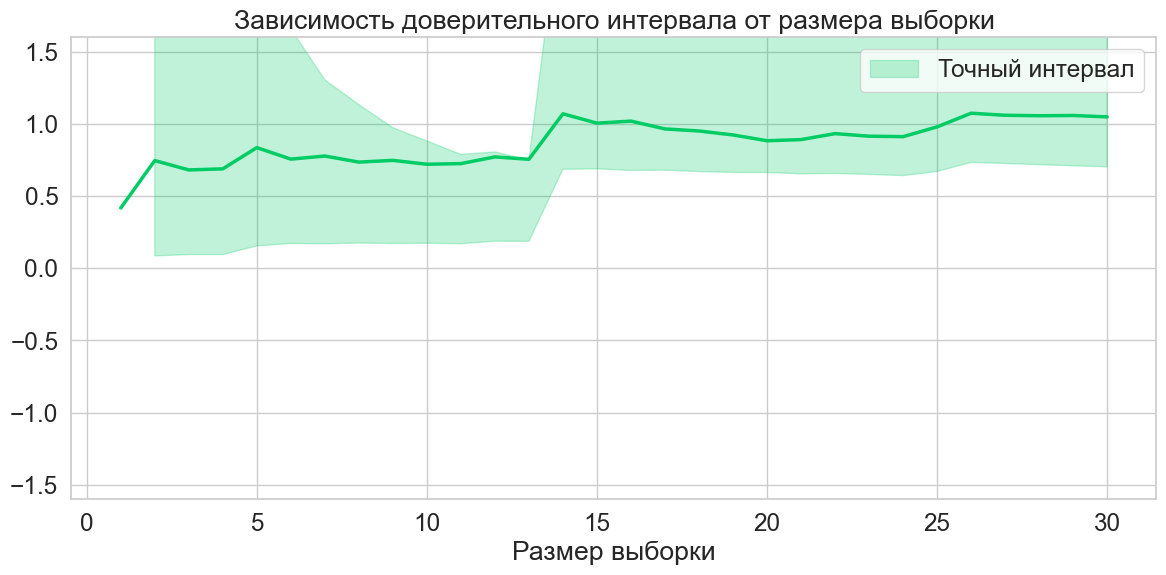

In [13]:
plt.figure(figsize=(14, 6))

# draw_confidence_interval(
#     left_asymptotic,
#     right_asymptotic,
#     mean,
#     sample,
#     ylim=(None, None),
#     color_estimation='#00CC66',
#     color_interval='#FF3300',
#     label_estimation='$\\overline{X}$',
#     label_interval='Интервал Вальда',
# )

draw_confidence_interval(
    left_exact,
    right_exact,
    mean,
    ylim=(-1.6, 1.6),
    color_estimation='#00CC66',
    color_interval='#00CC66',
    label_interval='Точный интервал',
)

---
### Задача 2 (не выполнено). 

В прошлой задаче вы получили два асимптотических доверительных интервала и один точный, а также соответствующие им статистические критерии. Самое время их сравнить на практике!

Число $\alpha$ всегда необходимо фиксировать до экспериментов, и ни в коем случае не подбирать по данным. Например, в случае AB-тестов это число может быть фиксировано отделом по рискам для всех экспериментов компании. В рамках задачи (и обычно на практике) мы используем уровень доверия $\alpha=0.95$, соответственно, уровень значимости критерия равен $1-\alpha=0.05$.

**1.** Сначала вспомним, как следует интерпретировать доверительные интервалы и статистические критерии. Зафиксируем значение $\theta$, соответствующее гипотезе $\mathsf{H}_0$.

In [1]:
theta = 1

Давайте промоделируем множество экспериментов с одинаковыми условиями. Сгенерируйте порядка 20 выборок размера 10, для каждой из них
* посчитайте численно границы всех трех доверительных интервалов
* проверьте гипотезу статистическими критериями.

Результат можно удобно оформить в виде таблицы, по строкам которой будут эксперименты, а по столбцам &mdash; границы доверительных интервалов и результаты применения критериев.

Повторите эксперимент в случае неверной $\mathsf{H}_0$

In [ ]:
theta = 2



Какие выводы можно сделать? Как правильно интерпретировать доверительные интервалы?

**2.** Для доверительных интервалов повторите эксперимент, показанный на семинаре, 
* построив визуализации доверительны интервалов при увеличении размера выборки,
* оценив долю покрытия параметра интервалом.

Кроме этого, оцените и визуализируйте также среднюю длину каждого интервала в зависимости от размера выборки.

Что можно теперь сказать про эти доверительные интервалы?

**3.** Для всех исследуемых критериев оцените вероятность ошибки 1 рода и постройте для них доверительный интервал. Пример оценки стоит посмотреть в семинарском ноутбуке, но в данном задании требуется построить такую оценку в засимимости от размера выборки.

Какие критерии не контролируют вероятность ошибки 1 рода на уровне 5\%?

Оцените мощность критериев в зависимости от значения $\theta$ и размера выборки. Пример такой оценки есть в семинарском ноутбуке.

Что можно теперь сказать про эти критерии?

---
### Задача 3 (частично выполнено).

В этой задаче мы продолжим исследовать <a href="https://raw.githubusercontent.com/bdemeshev/em301/master/datasets/flats_moscow.txt">данные</a> о стоимости квартир в Москве.	Описание данных доступно по <a href="https://github.com/bdemeshev/em301/blob/master/datasets/flats_moscow_description.txt">ccылке</a>. Перед выполнением задачи рекомендуется ознакомиться с семинарским ноутбуком.
	
Обучите линейную регрессионную модель для предсказания цены квартиры от всех других параметров.

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.3, palette='Set2')

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.datasets as smd
import statsmodels.api as sm

In [8]:
flats

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,110,77,45,10.0,12.0,5,0,0,1,5
2036,2037,95,60,43,6.0,9.0,5,0,0,1,4
2037,2038,95,60,46,5.0,10.5,5,1,0,1,7
2038,2039,129,76,48,10.0,12.5,5,0,0,1,3


In [10]:
import pandas as pd
import statsmodels
flats = pd.read_csv("flats_moscow.txt", sep='\t')
model = smf.ols('price ~ totsp+livesp+kitsp+dist+metrdist+walk+brick+floor+code', data=flats)
results = model.fit(cov_type='HC3')
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     142.6
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          1.19e-208
Time:                        14:29:11   Log-Likelihood:                -9779.0
No. Observations:                2040   AIC:                         1.958e+04
Df Residuals:                    2030   BIC:                         1.963e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.9780     13.493     -1.777      0.0

Проверьте гипотезы о незначимости признаков и постройте доверительные интервалы для коэффициентов модели.

In [13]:
print(results.t_test('totsp = 0'))


                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.5737      0.222      7.088      0.000       1.139       2.009


In [14]:
print(results.t_test('livesp = 0'))

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.3716      0.485      2.827      0.005       0.421       2.323


In [15]:
print(results.t_test('kitsp = 0'))

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.7409      0.730      2.384      0.017       0.310       3.172


In [17]:
print(results.t_test('dist = 0'))

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -3.1704      0.231    -13.748      0.000      -3.622      -2.718


In [19]:
print(results.t_test('metrdist = 0'))

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -1.2332      0.162     -7.629      0.000      -1.550      -0.916


In [20]:
print(results.t_test('walk = 0'))
print(results.t_test('brick = 0'))
print(results.t_test('floor = 0'))
print(results.t_test('code = 0'))

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             9.2209      1.234      7.475      0.000       6.803      11.639
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             6.9052      1.906      3.623      0.000       3.169      10.641
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             6.5504      1.347      4.865      0.000       3.911       9.190
                             Test for Constraints   

Почему-то оказалось, что площадь кухни не значима. Также жилая площадь квартиры имеет коэффициент близкий к 0 

Определите признаки желаемой для себя квартиры в Москве и постройте предсказательный интервал ее цены.

*Для выполнения этого и следующего пунктов обратите внимание на доверительные интервалы в линейной регрессии, рассказанные на лекции. В случае гетероскедастичности нужно использовать специальную оценку матрицы ковариаций, которую можно получить из `statsmodels`, примеры смотрите в семинарском ноутбуке.*

In [21]:
flats

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,110,77,45,10.0,12.0,5,0,0,1,5
2036,2037,95,60,43,6.0,9.0,5,0,0,1,4
2037,2038,95,60,46,5.0,10.5,5,1,0,1,7
2038,2039,129,76,48,10.0,12.5,5,0,0,1,3


In [22]:
new_data = flats.iloc[:5].copy()
prediction = results.predict(new_data)
prediction

0     99.117340
1     42.649180
2    119.336453
3     94.915670
4    204.763036
dtype: float64

Зафиксируйте все параметры, кроме площади квартиры и постройте доверительную ленту для цены квартиры. Иначе говоря, для каждого значения площади квартиры необходимо построить доверительный интервал для среднего значения цены квартиры. Аналогичным образом постройте предсказательную ленту.

In [ ]:
<...>

**Вывод:**

<...>

---
### Задача 4 (не выполнено).

Кардиотокография (КТГ) — непрерывная одновременная регистрация частоты сердечных сокращений плода и
тонуса матки с графическим изображением физиологических сигналов на калибровочной ленте. В настоящее
время КТГ является ведущим методом наблюдения за характером сердечной деятельности, который из-за
своей простоты в проведении, информативности и стабильности получаемой информации практически
полностью вытеснил из клинической практики фоно- и электрокардиографию плода.

Для облегчения задачи диагностики, результаты кардиотокографии некоторых эмбрионов были
классифицированы специалистами на нормальные и патологические. По показаниям приборов было
сгенерировано некоторое количество признаков.

**1.** Скачайте данные по ссылке: https://archive.ics.uci.edu/ml/datasets/cardiotocography. 
Данные расположены в листе `Data`. Рассматриваемые нами признаки указаны в листе Description в колонке Features. Целевой меткой является столбец `NSP`. Для анализа мы не будем рассматривать данные, целевой меткой которой является `Suspect`.

**2.** Проведите визуальный анализ данных. Какие признаки лучше всего разделяют классы? Какие преобразования признаков стоит выполнить?

**3.** Обучите логистическую регрессию по всем признакам. Напечатайте `summary` модели.
В чем причины такого поведения модели? Какие выводы можно сделать? Что нужно сделать, чтобы это исправить?

**4.** Оставьте только значимые и преобразованные признаки, обучите модель еще раз и проинтерпретируйте полученные результаты. Какой смысл имеют коэффициенты модели?

**5.** Для некоторых объектов из тестовой выборки оцените вероятность наличия патологии. Постройте также доверительный интервал уровня доверия 0.95 для этой вероятности.

*Указание.* Воспользуйтесь функцией <a href="https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLMResults.get_prediction.html">get_prediction</a> от `GLMResults`. Данная функция возвращает объект <a href="https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.PredictionResults.html">`PredictionResults`</a>, у которого можно вызвать метод `conf_int`.

Проинтерпретируйте границы полученных доверительных интервалов. Как их можно использовать в медицине?